<font size="5"><b>Case Study III</b><br><br>
Module 7: Supervised Learning-1
 </font>

<font color='red'>

Business challenge/requirement<br><br>
PeerLoanKart is an NBFC (Non-Banking Financial Company) which facilitates peer to
peer loan.<br>
It connects people who need money (borrowers) with people who have money
(investors). As an investor, you would want to invest in people who showed a profile
of having a high probability of paying you back.<br>
You as a ML expert create a model that will help predict whether a borrower will pay
the loan or not.<br><br>
Key issues<br>
Ensure NPAs are lower – meaning PeerLoanKart wants to be very diligent in giving
loans to borrower<br><br>
Considerations<br>
NONE<br><br>
Data volume<br>
-Approx 9578 records – file loan_borowwer_data.csv<br><br>
Fields in Data<br>
• credit.policy: 1 if the customer meets the credit underwriting criteria of
PeerLoanKart, and 0 otherwise<br>
• purpose: The purpose of the loan (takes values "credit_card",
"debt_consolidation", "educational", "major_purchase", "small_business", and
"all_other")<br>
• int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be
stored as 0.11). Borrowers judged by PeerLoanKart to be more risky are
assigned higher interest rates<br>
• installment: The monthly installments owed by the borrower if the loan is
funded<br>
• log.annual.inc: The natural log of the self-reported annual income of the
borrower<br>

dti: The debt-to-income ratio of the borrower (amount of debt divided by
annual income)<br>
• fico: The FICO credit score of the borrower<br>
• days.with.cr.line: The number of days the borrower has had a credit line<br>
• revol.bal: The borrower's revolving balance (amount unpaid at the end of the
credit card billing cycle)<br>
• revol.util: The borrower's revolving line utilization rate (the amount of the
credit line used relative to total credit available)<br>
• inq.last.6mths: The borrower's number of inquiries by creditors in the last 6
months<br>
• delinq.2yrs: The number of times the borrower had been 30+ days past due on
a payment in the past 2 years<br>
• pub.rec: The borrower's number of derogatory public records (bankruptcy
filings, tax liens, or judgments)<br>
• not.fully.paid: This is the output field. Please note that 1 means borrower
is not going to pay the loan completely<br>
Additional information<br>
-NA<br><br>
Business benefits<br>
Increase in profits up to 20% as NPA will be reduced due to loan disbursal for only
good borrowers

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [108]:
data = pd.read_csv('loan_borowwer_data.csv')

In [111]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [112]:
deep_copy_data = data.copy(deep=True)

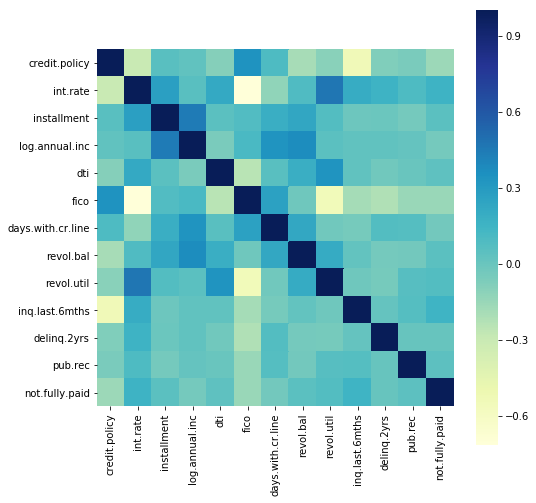

In [113]:
plt.figure(figsize=(8,8))
corelation = data.corr()
sn.heatmap(corelation,cmap='YlGnBu',square=True)

In [114]:
#x = deep_copy_data['not.fully.paid']
#deep_copy_data.drop('purpose',axis=1,inplace=True)

In [115]:
deep_copy_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [116]:
deep_copy_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Text(0.5, 0, 'FICO')

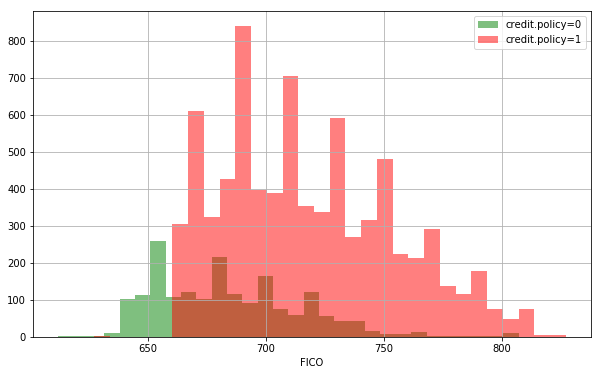

In [117]:
plt.figure(figsize=(10,6))
deep_copy_data[deep_copy_data['credit.policy']==0]['fico'].hist(alpha=.5,color='green',bins=30,label='credit.policy=0')
deep_copy_data[deep_copy_data['credit.policy']==1]['fico'].hist(alpha=.5,color='red',bins=30,label='credit.policy=1')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

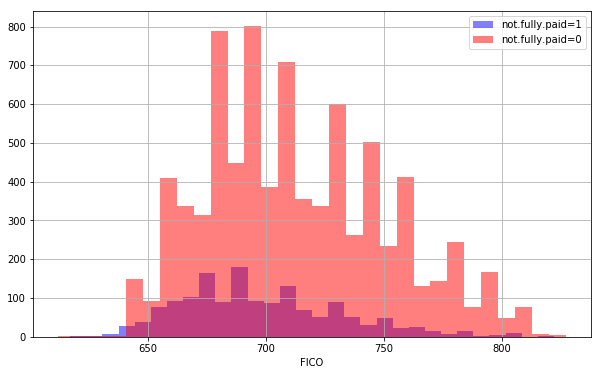

In [118]:
plt.figure(figsize=(10,6))
deep_copy_data[deep_copy_data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
deep_copy_data[deep_copy_data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

In [119]:
deep_copy_data.rename(columns={'not.fully.paid':'not_fully_paid'},inplace=True)

In [120]:
deep_copy_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


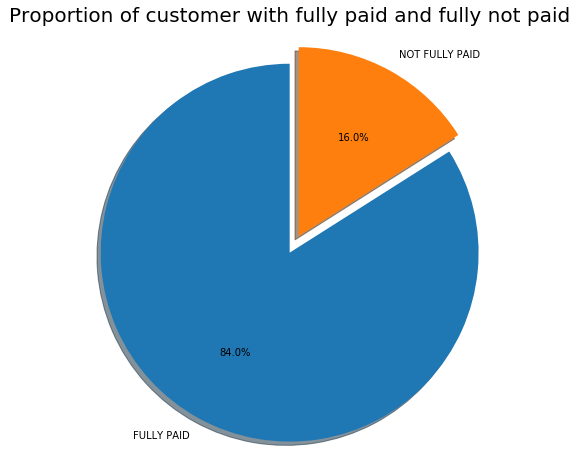

In [121]:
labels = 'FULLY PAID','NOT FULLY PAID'
sizes = [deep_copy_data.not_fully_paid[deep_copy_data['not_fully_paid']==0].count(), deep_copy_data.not_fully_paid[deep_copy_data['not_fully_paid']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer with fully paid and fully not paid", size = 20)
plt.show()

In [122]:
labels = deep_copy_data['purpose'].astype('category').cat.categories.tolist()
count = deep_copy_data['purpose'].value_counts()

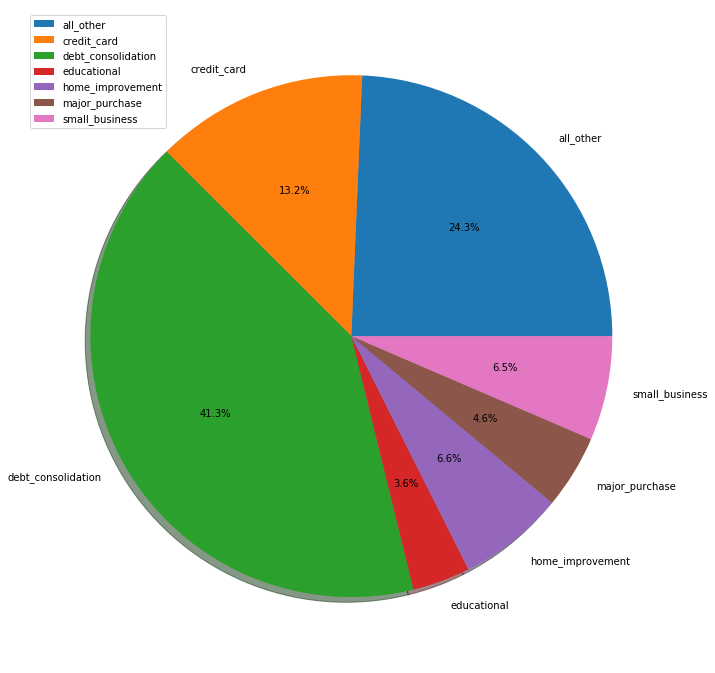

In [123]:
sizes = [count[var_cat] for var_cat in labels]
plt.figure(figsize=(15,12))
explode = (0.1, 0, 0, 0, 0,0,0)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.legend()
plt.show()

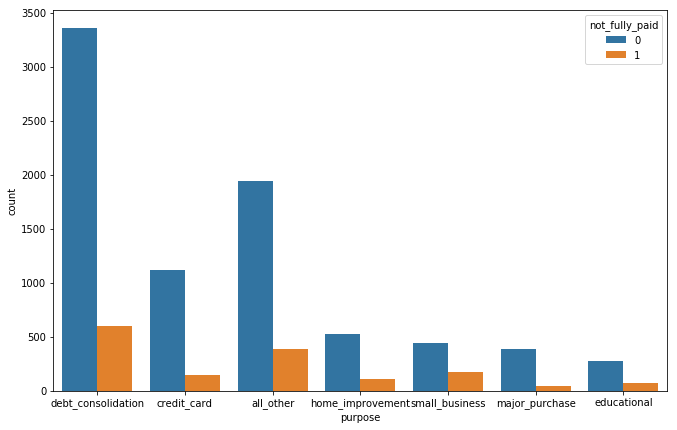

In [124]:
plt.figure(figsize=(11,7))
sn.countplot(x='purpose',hue='not_fully_paid',data=deep_copy_data)

In [125]:
dp = ['purpose']
fd = pd.get_dummies(deep_copy_data,columns=dp,drop_first=True)
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not_fully_paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [126]:
y = fd.not_fully_paid
fd.drop('not_fully_paid',axis=1,inplace=True)
x=fd[:]


In [127]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=.30)
dis_model = DecisionTreeClassifier()
dis_model.fit(train_x,train_y)
y_pred = dis_model.predict(test_x)

In [128]:
metrics.accuracy_score(y_pred,test_y)

0.7425191370911621

In [129]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2404
           1       0.23      0.25      0.24       470

   micro avg       0.74      0.74      0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.74      0.75      2874



In [130]:
print(confusion_matrix(test_y,y_pred))

[[2017  387]
 [ 353  117]]


In [131]:
randf_model = RandomForestClassifier(n_estimators=300)
randf_model.fit(train_x,train_y)
y_pred_rand = randf_model.predict(test_x)

In [132]:
y_pred_rand

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [133]:
metrics.accuracy_score(y_pred_rand,test_y)

0.837160751565762